In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import arviz as az
import pymc3 as pm

sns.set(style="ticks", context='poster')
%matplotlib inline

RANDOM_SEED = 8927

**Author:** [Ata Kalirad](https://github.com/Kalirad)

# A) Experimental supp figures

## Figure S3

In [3]:
def standardize(x):
    return (x - x.mean()) / x.std()

In [4]:
pred_c = pd.read_excel('./raw_data/supp/Killing_correlation.xlsx')

In [5]:
x_MF = standardize(pred_c['MF'])

In [6]:
with pm.Model() as nb_reg_model:
    # A simple Bayesian negative binomial regression model
    β0 = pm.Normal("β0", 0., 2.5)
    β_MF = pm.Normal("β_MF", 0., 2.5)
    η = β0 + β_MF * x_MF
    α = pm.HalfNormal("α", 2.5)
    obs = pm.NegativeBinomial("obs", np.exp(η), α, observed=pred_c['Corpses'])

In [7]:
with nb_reg_model:
    trace = pm.sample(5000, tune=2000, random_seed=RANDOM_SEED, return_inferencedata=False)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [α, β_MF, β0]


/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 2_000 tune and 5_000 draw iterations (8_000 + 20_000 draws total) took 19 seconds.


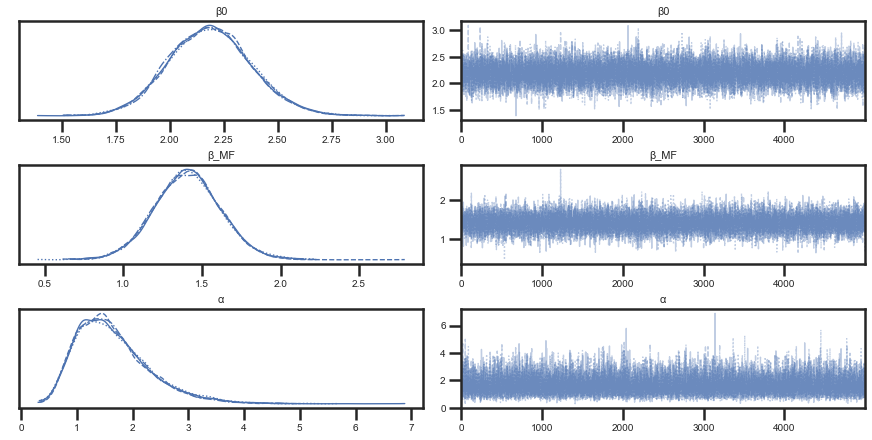

In [8]:
with nb_reg_model:
    az.plot_trace(trace)

In [9]:
with nb_reg_model:
    display(az.summary(trace, round_to=2, hdi_prob=0.95))

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
β0,2.19,0.19,1.83,2.58,0.00,0.0,15445.22,13378.65,1.0
β_MF,1.41,0.21,0.99,1.82,0.00,0.0,17482.37,13599.33,1.0
α,1.65,0.66,0.57,2.98,0.01,0.0,18624.56,12457.87,1.0


In [10]:
with nb_reg_model:
    ppc = pm.sample_posterior_predictive(trace, var_names=["β0", "β_MF", "obs"])

/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/arviz/stats/stats.py:456: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


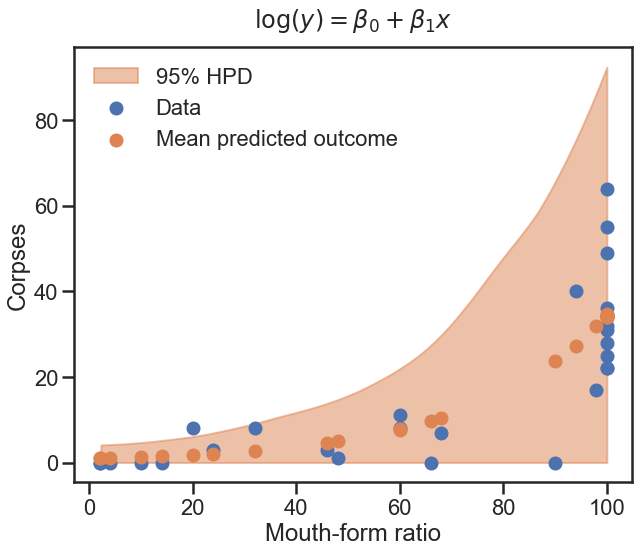

In [12]:
_, ax = plt.subplots(figsize=(10,8))
az.plot_hdi(pred_c['MF'], ppc["obs"], ax=ax, fill_kwargs={"alpha": 0.5, "label": "95% HPD"},
hdi_prob=0.95)
plt.scatter(pred_c['MF'], pred_c['Corpses'], label='Data')
plt.scatter(pred_c['MF'], np.mean(ppc["obs"].T, axis=1), label='Mean predicted outcome')
plt.legend(frameon=False)
ax.set_xlabel(r"Mouth-form ratio")
ax.set_ylabel("Corpses")
ax.set_title(r"$\mathrm{log}(y) = \beta_0 + \beta_1 x$", pad=20)

plt.savefig('./FigS3.pdf', bbox_inches='tight', dpi=300)

## Figure S4

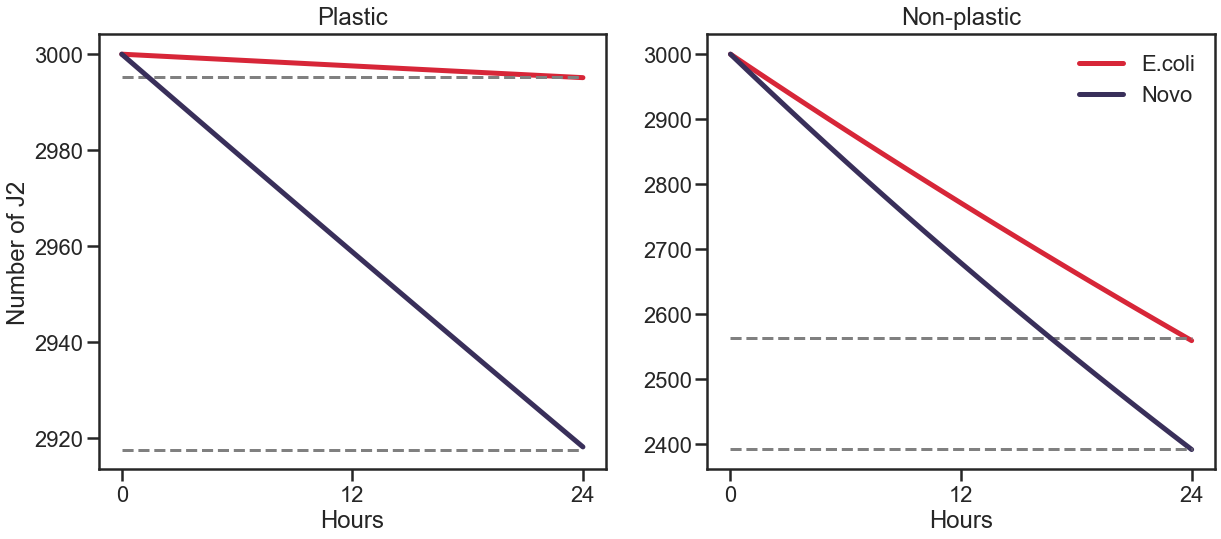

In [2]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
n_v = 3000
n_p = 20 * 0.02
a = 0.00017 
lst = []
lst.append(n_v)
for i in range(24):
    n_v -= a * n_v * n_p
    if n_v <= 0:
        n_v = 0
    lst.append(n_v)
ax[0].plot(lst, lw=5,color='#D72638', label='E.coli')
ax[0].hlines(3000 - 4.8, 0, 24, ls='--',colors='grey')


n_v = 3000
n_p = 20 * 0.9
a = 0.000064 
lst = []
lst.append(n_v)
for i in range(24):
    n_v -= a * n_v * n_p
    if n_v <= 0:
        n_v = 0
    lst.append(n_v)
    
ax[0].plot(lst, lw=5, color='#392F5A', label='Novo')
ax[0].hlines(3000 - 82.4, 0, 24, ls='--',colors='grey')
# ax[0].legend(frameon=False)
ax[0].set_ylabel('Number of J2')
ax[0].set_xlabel('Hours')
ax[0].set_title(r'Plastic', pad=10)

n_v = 3000
n_p = 20 
a = 0.00033 
lst = []
lst.append(n_v)
for i in range(24):
    n_v -= a * n_v * n_p
    if n_v <= 0:
        n_v = 0
    lst.append(n_v)
ax[1].plot(lst, lw=5,color='#D72638', label='E.coli')
ax[1].hlines(3000 - 436.8, 0, 24, ls='--',colors='grey')


n_v = 3000
n_p = 20
a = 0.00047 
lst = []
lst.append(n_v)
for i in range(24):
    n_v -= a * n_v * n_p
    if n_v <= 0:
        n_v = 0
    lst.append(n_v)
    
ax[1].plot(lst, lw=5, color='#392F5A', label='Novo')
ax[1].hlines(3000 - 608.2, 0, 24, ls='--',colors='grey')
ax[1].legend(frameon=False)
#ax[1].set_ylabel('Number of J2')
ax[1].set_xlabel('Hours')
ax[1].set_title(r'Non-plastic', pad=10)

ax[0].set_xticks([0, 12, 24])
ax[0].set_xticklabels([0, 12, 24])

ax[1].set_xticks([0, 12, 24])
ax[1].set_xticklabels([0, 12, 24])


plt.savefig('./S4.pdf', bbox_inches='tight', dpi=300)

# B) Modeling supp figures

In [13]:
%run digital_worm.py

<Figure size 432x288 with 0 Axes>

## Figure S5

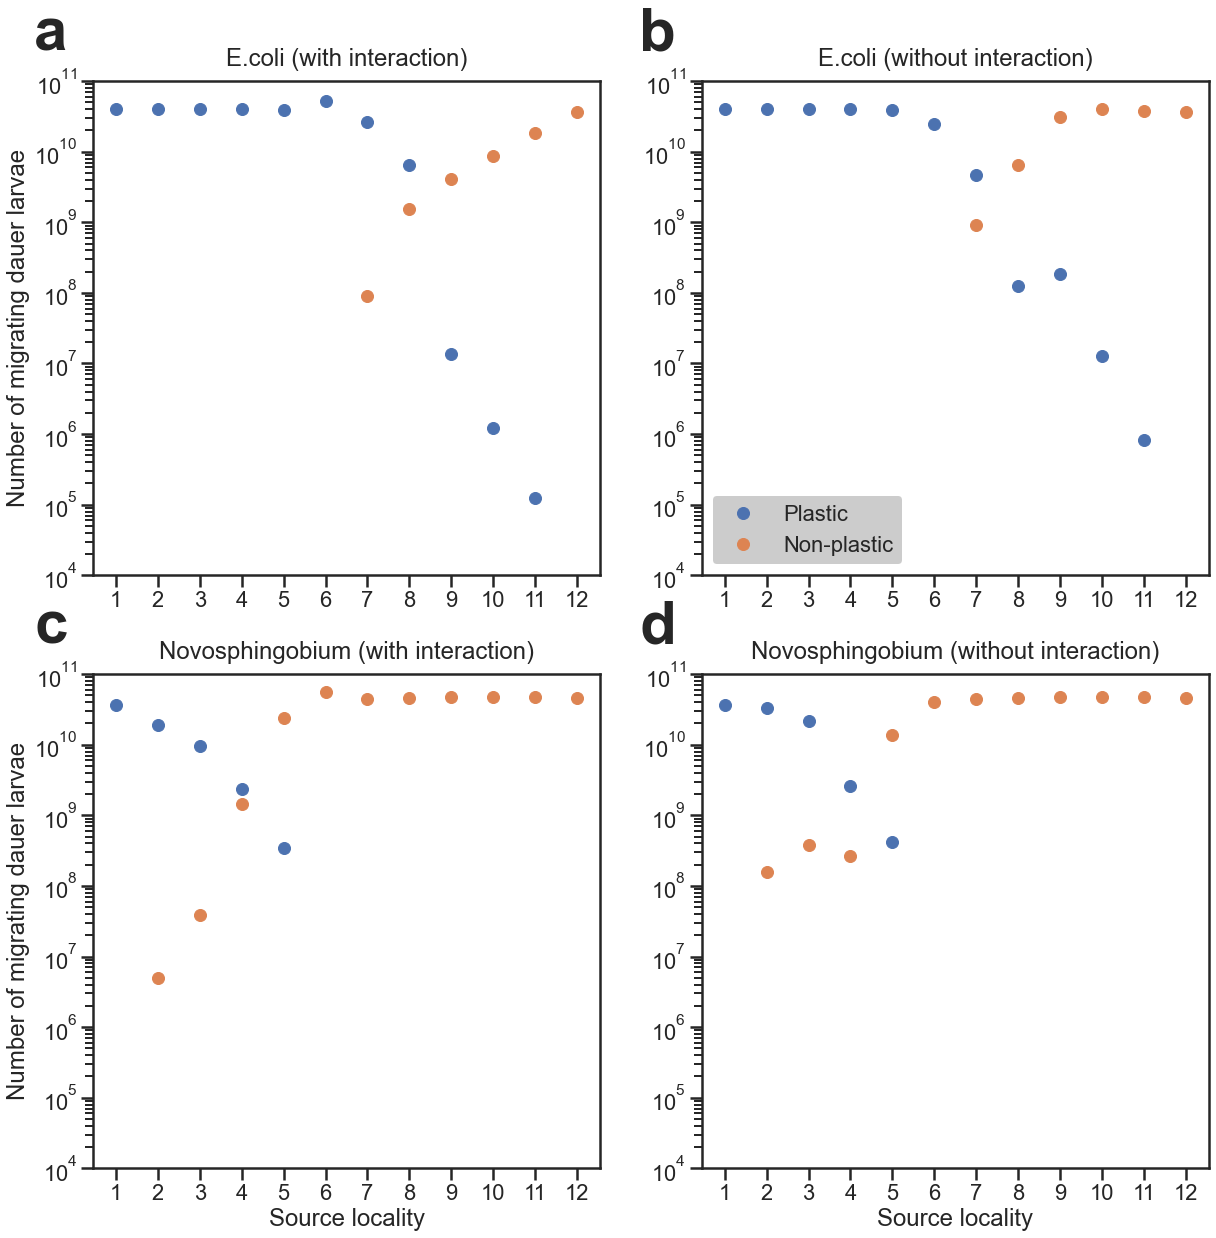

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))


data, index, mig = simulate_pop_dynamic('A', 'C', 'OP50', inti_food=5e11, mig_rate=0.1, n_pop = 12,  t = 1000, predation=True)

x = np.arange(1, 13, 1)
x2 = np.arange(12, 0, -1)
RSC017_mig = []
RS5405_mig = []
for i in index:
    RSC017_mig.append(np.sum(mig['dauer_A'][i]))
for i in index:
    RS5405_mig.append(np.sum(mig['dauer_C'][i]))
RS5405_mig.reverse()

ax[0][0].plot(x, RSC017_mig, 'o', label='RSC017')
ax[0][0].plot(x2, RS5405_mig, 'o', label='RS5405')
ax[0][0].set_yscale('log')
ax[0][0].set_ylabel('Number of migrating dauer larvae')
ax[0][0].set_title('E.coli (with interaction)', pad=15)
ax[0][0].set_xticks(np.linspace(1, 12, 12))

data, index, mig = simulate_pop_dynamic('A', 'C', 'OP50', inti_food=5e11, mig_rate=0.1, n_pop = 12,  t = 1000, predation=False)

RSC017_mig = []
RS5405_mig = []
for i in index:
    RSC017_mig.append(np.sum(mig['dauer_A'][i]))
for i in index:
    RS5405_mig.append(np.sum(mig['dauer_C'][i]))
RS5405_mig.reverse()

ax[0][1].plot(x, RSC017_mig, 'o', label='Plastic')
ax[0][1].plot(x2, RS5405_mig, 'o', label='Non-plastic')
ax[0][1].set_yscale('log')
# ax[0][1].set_xlabel('Source locality')
ax[0][1].set_title('E.coli (without interaction)', pad=15)
ax[0][1].set_xticks(np.linspace(1, 12, 12))
ax[0][1].set_ylim(1e4, 1e11)
ax[0][0].set_ylim(1e4, 1e11)
leg = ax[0][1].legend(frameon=True, facecolor='silver')
leg.get_frame().set_linewidth(0)

data, index, mig = simulate_pop_dynamic('A', 'C', 'Novo', inti_food=5e11, mig_rate=0.1, n_pop = 12,  t = 1000, predation=True)

RSC017_mig = []
RS5405_mig = []
for i in index:
    RSC017_mig.append(np.sum(mig['dauer_A'][i]))
for i in index:
    RS5405_mig.append(np.sum(mig['dauer_C'][i]))
RS5405_mig.reverse()

ax[1][0].plot(x, RSC017_mig, 'o', label='RSC017')
ax[1][0].plot(x2, RS5405_mig, 'o', label='RS5405')
ax[1][0].set_yscale('log')
ax[1][0].set_xlabel('Source locality')
ax[1][0].set_title('Novosphingobium (with interaction)', pad=15)
ax[1][0].set_ylabel('Number of migrating dauer larvae')
ax[1][0].set_xticks(np.linspace(1, 12, 12))
ax[1][0].set_ylim(1e4, 1e11)

data, index, mig = simulate_pop_dynamic('A', 'C', 'Novo', inti_food=5e11, mig_rate=0.1, n_pop = 12,  t = 1000, predation=False)

RSC017_mig = []
RS5405_mig = []
for i in index:
    RSC017_mig.append(np.sum(mig['dauer_A'][i]))
for i in index:
    RS5405_mig.append(np.sum(mig['dauer_C'][i]))
RS5405_mig.reverse()

ax[1][1].plot(x, RSC017_mig, 'o', label='RSC017')
ax[1][1].plot(x2, RS5405_mig, 'o', label='RS5405')
ax[1][1].set_yscale('log')
ax[1][1].set_xlabel('Source locality')
ax[1][1].set_title('Novosphingobium (without interaction)', pad=15)
ax[1][1].set_xticks(np.linspace(1, 12, 12))
ax[1][1].set_ylim(1e4, 1e11)

for i, label in zip([(0,0),(0,1),(1,0),(1,1)], ['a', 'b', 'c', 'd']):
    ax[i[0]][i[1]].text(-.05, 1.15, label,fontsize=60, weight='bold', transform=ax[i[0]][i[1]].transAxes, va='top', ha='right')


plt.savefig('./FigS6.pdf', bbox_inches='tight', dpi=300)

## Figure S6

In [15]:
%run digital_worm_n_dev_dif.py

<Figure size 432x288 with 0 Axes>

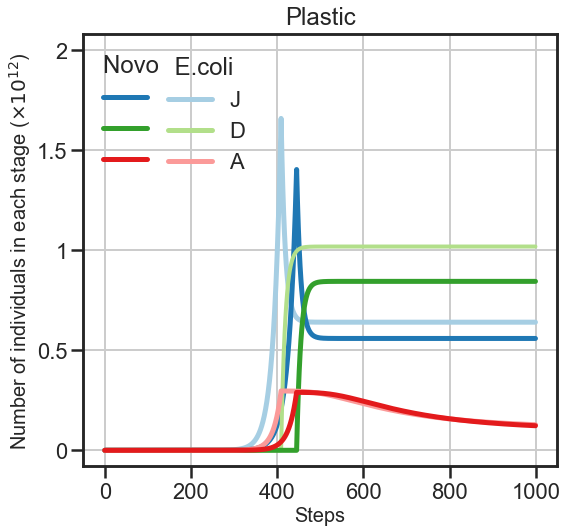

In [16]:
grad = sns.color_palette("Paired")

food_0 = 1e12

labls = ['J', 'D', 'A']


fig, ax = plt.subplots(1, 1, figsize=(8,7.5))
    
sim, index, md = simulate_pop_dynamic('A', 'A', food_type=['OP50', 'Novo'], inti_food=12*food_0, mig_rate=0.0, n_pop=2,  t=1000)
for l in range(3):
    if l == 0:
        ax.plot([i[1][0]+i[3][0]+i[4][0] for i in sim['pop1'][(0,0)]], lw=5, color=grad[0])
        ax.plot([i[1][0]+i[3][0]+i[4][0] for i in sim['pop2'][(0, 1)]], label=labls[l], lw=5, color=grad[1])
    elif l == 1:
        ax.plot([i[2][0] for i in sim['pop1'][(0,0)]], lw=4, color=grad[2])
        ax.plot([i[2][0] for i in sim['pop2'][(0, 1)]], label=labls[l],  lw=5, color=grad[3])
    else:
        ax.plot([np.sum(i[5:]) for i in sim['pop1'][(0,0)]], lw=5, color=grad[4])
        ax.plot([np.sum(i[5:]) for i in sim['pop2'][(0, 1)]], label=labls[l],  lw=5, color=grad[5])
        
axpad=8e10
ax.set_ylim(-1*axpad, 2e12 + axpad)
ax.set_yticks(np.linspace(0, 2e12, 5))
ax.set_yticklabels([ 0, 0.5, 1, 1.5, 2])
ax.set_xlabel(r"Steps", fontsize=20)
ax.grid(True)

ax.set_title('Plastic', pad=10)

ax.set_ylabel(r'Number of individuals in each stage ($\times 10^{12}$)', fontsize=20)

ax2 = ax.twinx()
for l, count in zip(range(3), [0, 2, 4]):
    ax2.plot(0, label=labls[l], lw=5, color=grad[count])
ax2.set_yticklabels([])
ax2.tick_params(axis='y', which='both', bottom=True, top=False,
            labelbottom=True, size=0, width=3, direction='out', pad=5, colors='black')

leg = ax.legend(loc='upper left',frameon=False, title='Novo ', labelcolor='white')
leg2= ax2.legend(loc=(0.15 + 0.01,0.66),frameon=False, title=' E.coli')
leg._legend_box.align = "left"
leg2._legend_box.align = "left"

plt.tight_layout(w_pad=5)

plt.savefig('./FigS6.pdf', bbox_inches='tight', dpi=300)

In [8]:
%load_ext watermark
%watermark -n -u -v -iv -w -p graphviz

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: Tue Feb 15 2022

Python implementation: CPython
Python version       : 3.7.10
IPython version      : 7.25.0

graphviz: not installed

pandas    : 1.3.1
pymc3     : 3.9.3
matplotlib: 3.4.2
arviz     : 0.10.0
seaborn   : 0.11.1
numpy     : 1.21.0

Watermark: 2.3.0

